In [2]:
import os 
señales = os.listdir('seNales')
señales

['presion.txt',
 'frecs.txt',
 '.ipynb_checkpoints',
 'respiracion.txt',
 'ecg.txt',
 'emg.txt',
 'necg.txt',
 'eeg.txt']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import norm
from scipy.fft import fft, ifft

# Actividad
Para ecg, eeg, presion, respiracion:
- Cargar archivo
- Eliminar la continua (restar la media) -> Gráfica temporal
- Calcular la TDF
- Graficar $|F|$
- Graficar $log(|F|)$
## ECG

In [4]:
fm = 250
ecg = np.loadtxt('seNales/ecg.txt')
continua = ecg.mean()
N = len(ecg)
ecg = ecg - continua
t = np.arange(0, 1/fm*N, 1/fm)

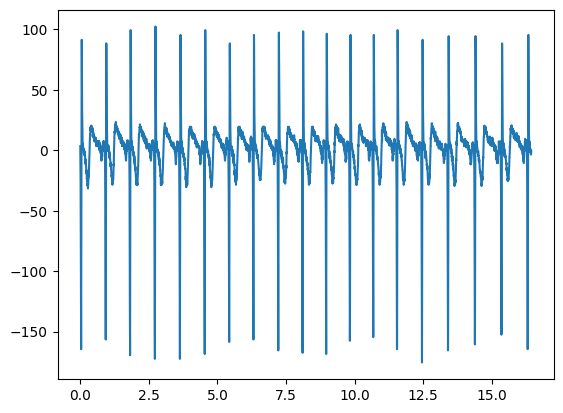

In [5]:
plt.plot(t, ecg)

In [6]:
S = fft(ecg) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud

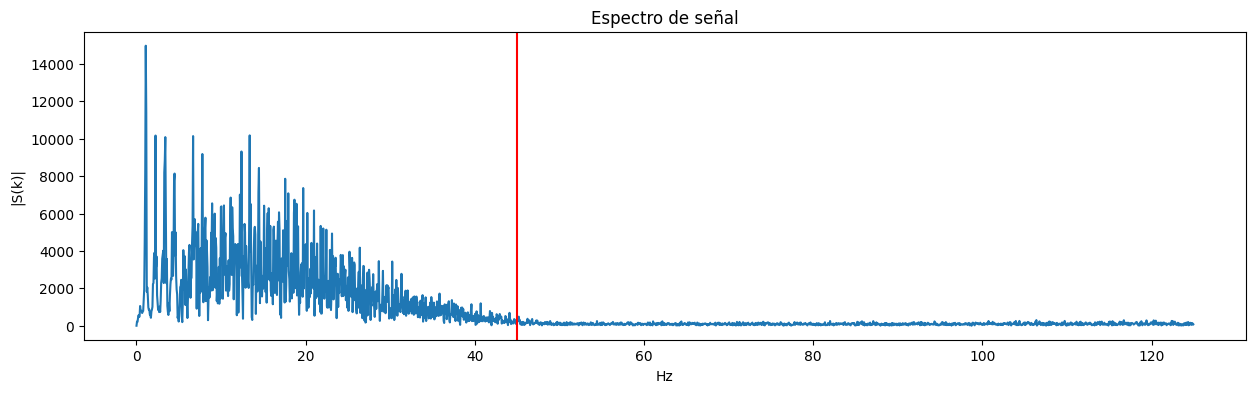

In [7]:
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.plot(f, Sabs[0:int(N/2)])
plt.axvline(45, color = 'red')

$$ AB \approx 45$$

## EEG

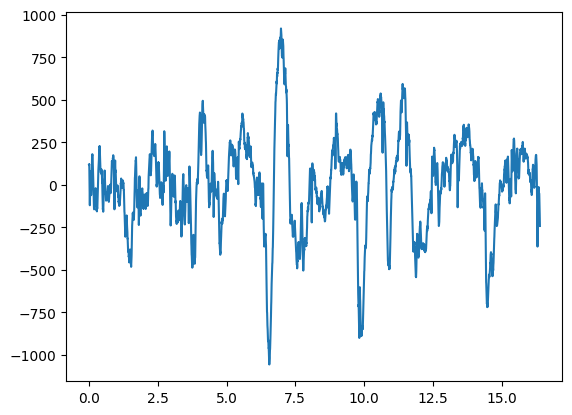

In [8]:
fm = 250
eeg = np.loadtxt('seNales/eeg.txt')
continua = eeg.mean()
N = len(eeg)
eeg = eeg - continua
t = np.arange(0, 1/fm*N, 1/fm)
plt.plot(t, eeg)

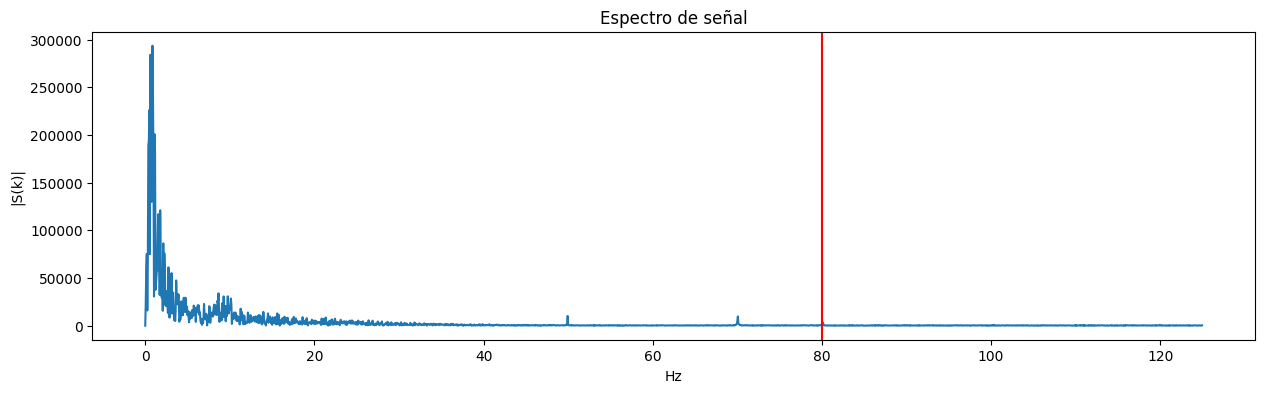

In [9]:
S = fft(eeg) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.plot(f, Sabs[0:int(N/2)])
plt.axvline(80, color = 'red')

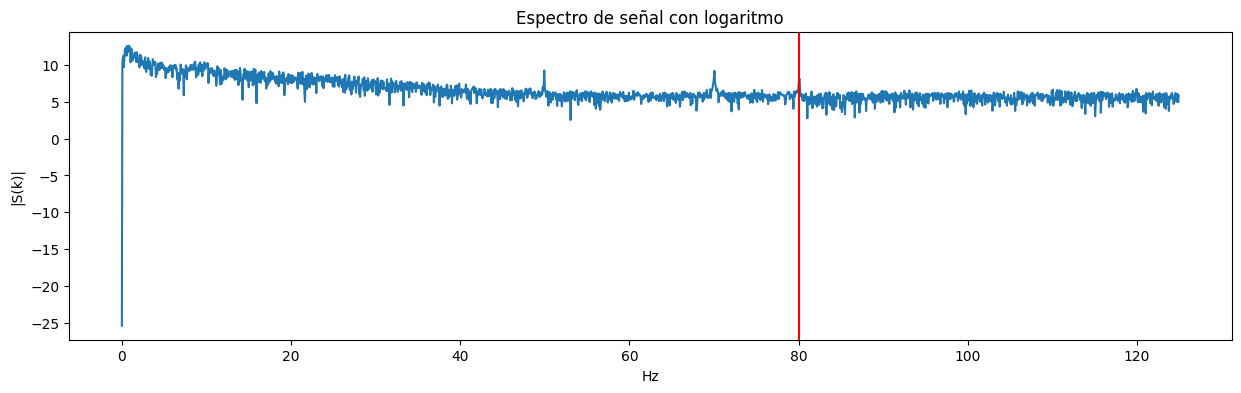

In [10]:
Slog = np.log(np.abs(S)) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal con logaritmo")
plt.plot(f, Slog[0:int(N/2)])
plt.axvline(80, color = 'red')

$$ AB \approx 91$$

## Respiración

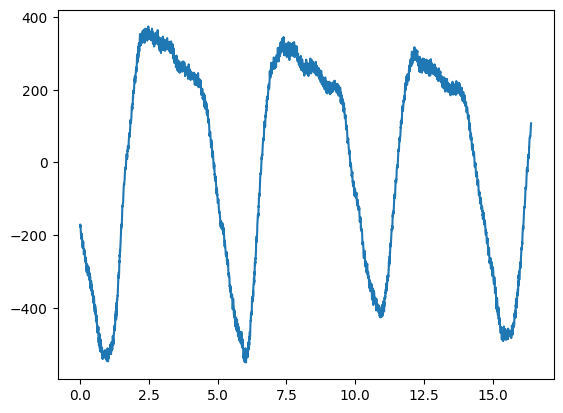

In [11]:
fm = 250
resp = np.loadtxt('seNales/respiracion.txt')
continua = resp.mean()
N = len(resp)
resp = resp - continua
t = np.arange(0, 1/fm*N, 1/fm)
plt.plot(t, resp)

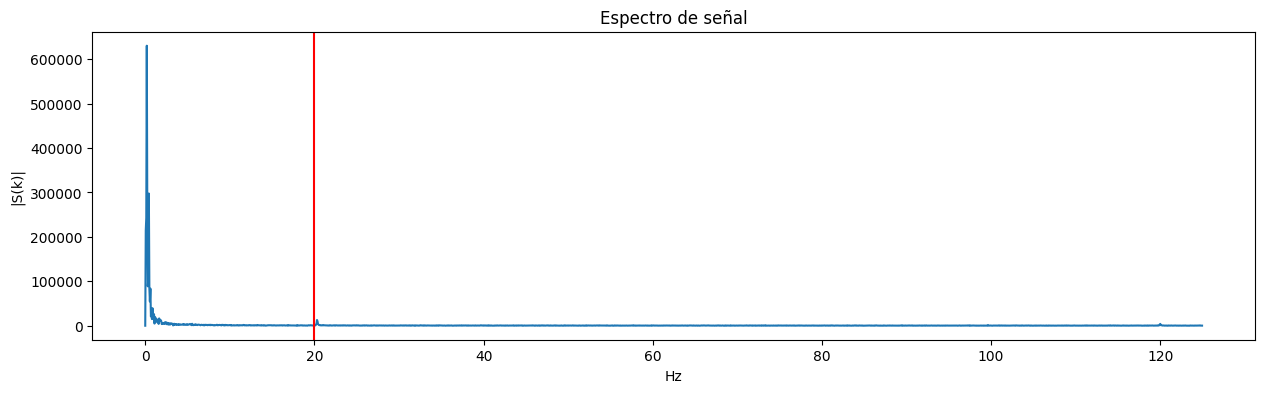

In [12]:
S = fft(resp) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.plot(f, Sabs[0:int(N/2)])
plt.axvline(20, color = 'red')

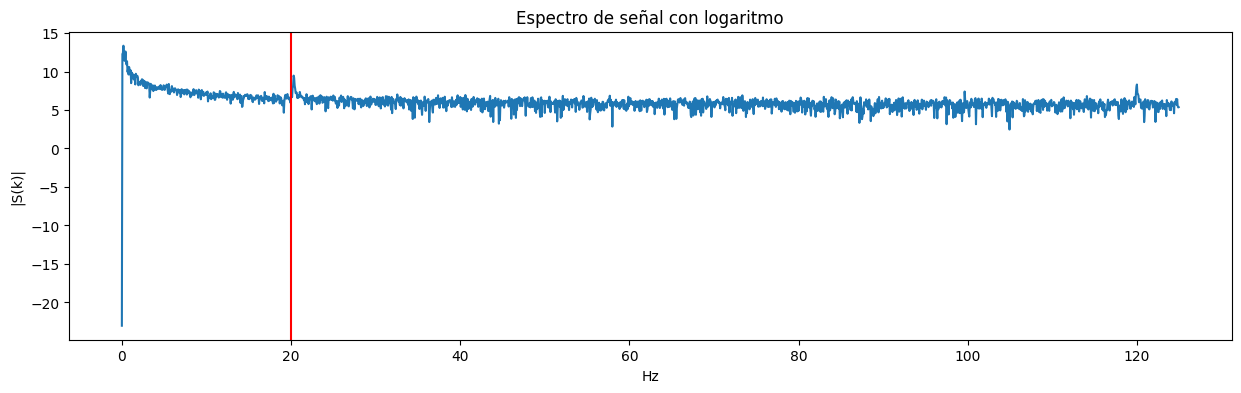

In [13]:
Slog = np.log(np.abs(S)) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal con logaritmo")
plt.plot(f, Slog[0:int(N/2)])
plt.axvline(20, color = 'red')

$$ AB \approx 20 $$
## Presion

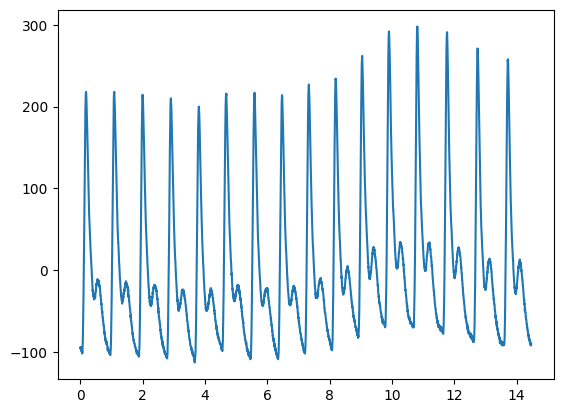

In [14]:
fm = 250
pres = np.loadtxt('seNales/presion.txt')
continua = pres.mean()
N = len(pres)
pres = pres - continua
t = np.arange(0, 1/fm*N, 1/fm)
plt.plot(t, pres)

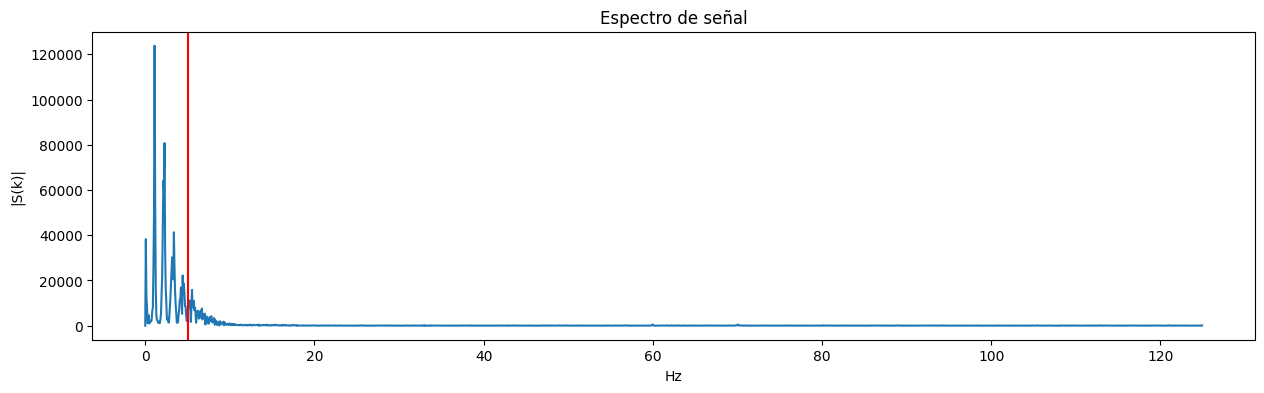

In [15]:
S = fft(pres) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.xlabel("Hz")
plt.ylabel("|S(k)|")
plt.title("Espectro de señal")
plt.plot(f, Sabs[0:int(N/2)])
plt.axvline(5, color = 'red')

$$AB \approx 5$$


# Ejercicio 6
Queremos sacar el ruido pero en el espacio continuo sería muy complicado por eso en el dominio frecuencial la separamos.

Text(0.5, 1.0, 'Señal con ruido')

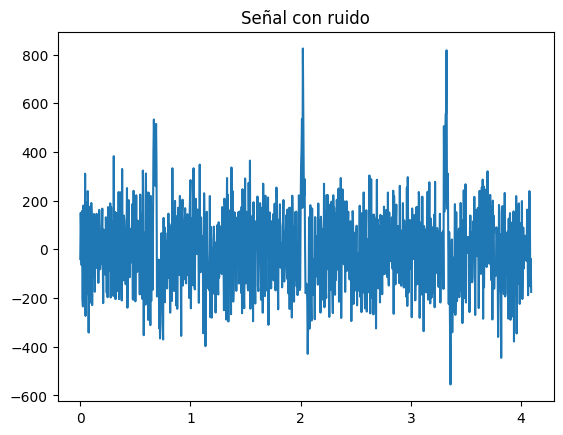

In [16]:
fm = 250
necg = np.loadtxt('seNales/necg.txt')
continua = necg.mean()
N = len(necg)
necg = necg - continua
t = np.arange(0, 1/fm*N, 1/fm)
plt.plot(t, necg)
plt.title("Señal con ruido")

Hacer la transformada, graficar muestras y hacer cero los valores de S que corresponden al ruido.

$S(mi:mf)=0$

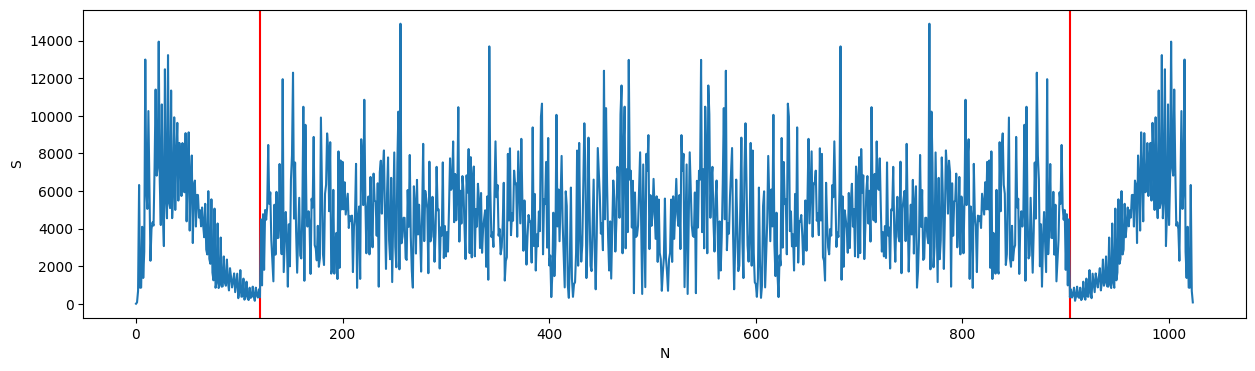

In [17]:
S = fft(necg) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.figure(figsize=(15, 4))
plt.axvline(120, color='red')
plt.axvline(1024-120, color='red')
plt.xlabel("N")
plt.ylabel("S")
plt.plot(Sabs)

(854.0, 954.0)

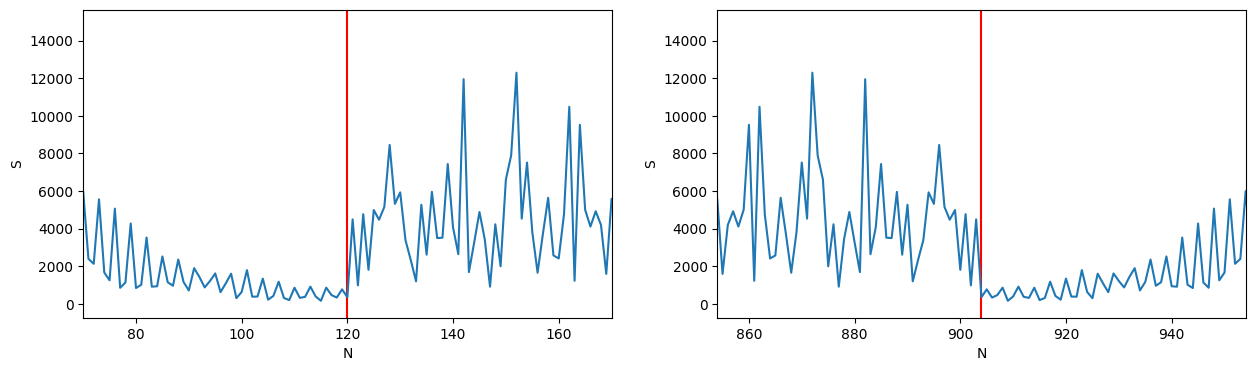

In [18]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.axvline(120, color='red')
plt.axvline(1024-120, color='red')
plt.xlabel("N")
plt.ylabel("S")
plt.plot(Sabs)
plt.xlim(120-50, 120+50)

plt.subplot(122)
plt.axvline(1024-120, color='red')
plt.xlabel("N")
plt.ylabel("S")
plt.plot(Sabs)
plt.xlim(1024-120-50, 1024-120+50)

In [19]:
S[120:1024-120] = 0

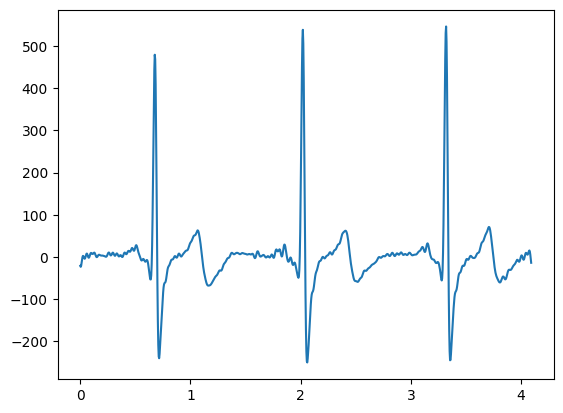

In [20]:
limpia = ifft(S).real
plt.plot(t, limpia)

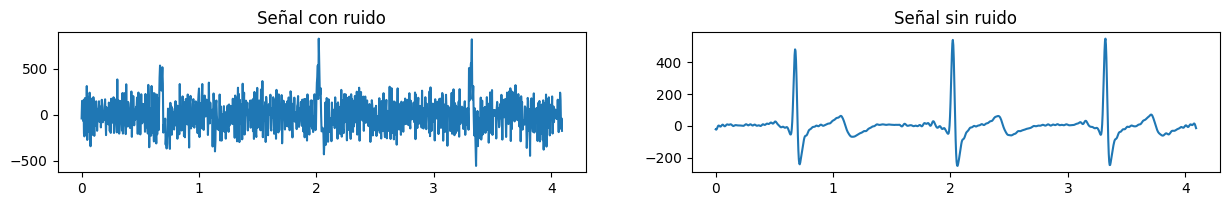

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(221)
plt.plot(t, necg)
plt.title("Señal con ruido")

plt.subplot(222)
plt.plot(t, limpia)
plt.title("Señal sin ruido")

plt.show()

# Ventanas
Cuando uno toma señales de archivo, podemos no pegarle al período exacto de la señal, puede no terminar ni emepzar en 0. Esto puede que afecte en la trasnformada, porque Fourier asume que antes y despues es periódica e infinito. 

Si el ciclo no es perfecto me gerea ruido. Se empiezan a solapar espectros.

## Efecto del ventaneo
Significa que en el período que existe la señal le aplico alguna de las formas de ventanas y multiplico elemento a elemento la señal con la ventana (las ventantas siempre tienen amplitud unitaria). Va a hacer que siempre empiecen y terminen en 0 y que además sean continuas. Se reduce mucho el ripple.

Nunca tocamos el contenido frecuencial, los picos estarán en la misma posición. La información que pierdo es de amplitudes. 

Gano que el espectro frecuencial no tenga tanto ripple.
# Ejercicio inventado
- Efecto ventaneo
    - $f_m = 100Hz$
    - $t <= 1s$
    - Senoidal de $10,5Hz$
    - Ventanear: Hamming, haning
 
  
El aliassing es cuando el ancho de banda no esta contenido en la frecuencia de muestreo.
Probar aliassing:

- $f_m = 100Hz$
- $t <= 1s$
- x: sumane de senoidales
    - f1 = 20
    - f2 = 60
- Analizar en t y f
- Corregir el aliasing cambiando la freucencia de muestreo

In [40]:
fm = 100
t = np.arange(0, 1, 1/fm)
sen = np.sin(2*np.pi*10.5*t)
N = len(sen)
ven_hamm = np.hamming(N)
ven_hann = np.hanning(N)

In [41]:
sen_ven_hamm = sen*ven_hamm
sen_ven_hann = sen*ven_hann

Text(0.5, 1.0, 'Ventana de Hanning')

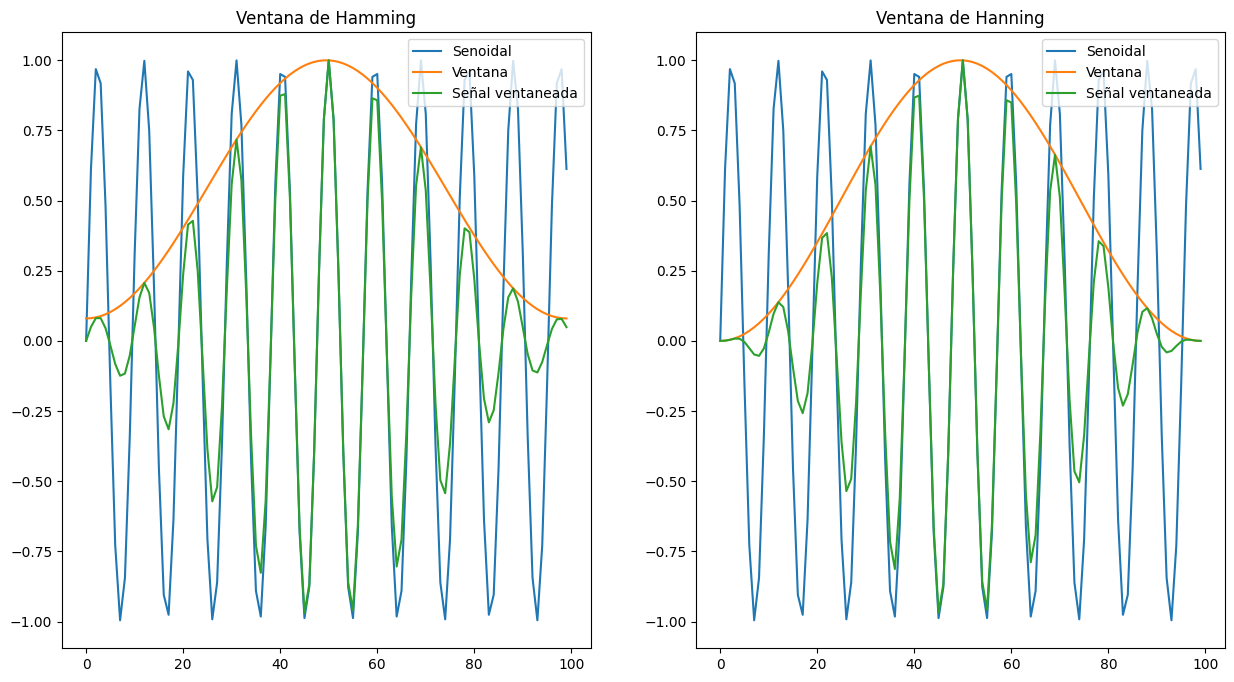

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(sen, label="Senoidal")
plt.plot(ven_hamm, label="Ventana")
plt.plot(sen_ven_hamm, label="Señal ventaneada")
plt.legend()
plt.title("Ventana de Hamming")

plt.subplot(122)
plt.plot(sen, label="Senoidal")
plt.plot(ven_hann, label="Ventana")
plt.plot(sen_ven_hann, label="Señal ventaneada")
plt.legend()
plt.title("Ventana de Hanning")



/tmp/ipykernel_4826/2257015705.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)
/tmp/ipykernel_4826/2257015705.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

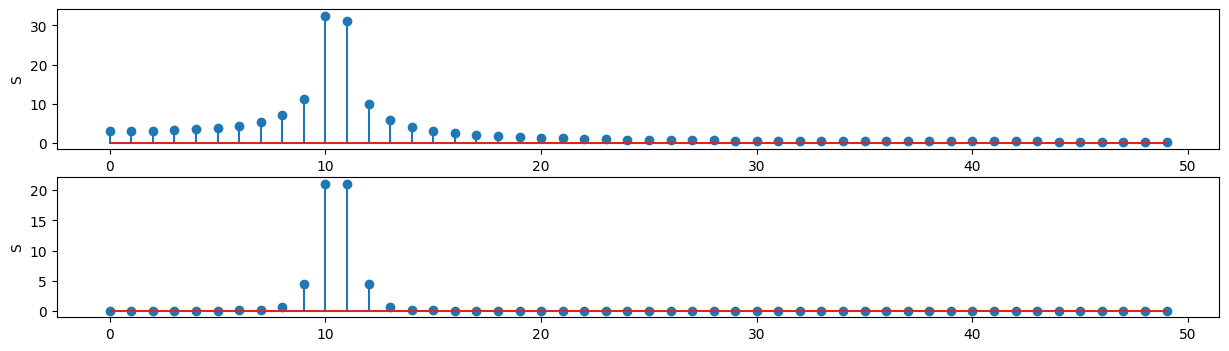

In [43]:
S = fft(sen) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N)

plt.figure(figsize=(15, 4))
plt.subplot(211)
plt.xlabel("N")
plt.ylabel("S")
# plt.plot(Sabs)
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

S = fft(sen_ven_hann) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
# f = np.arange(0, fm, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.subplot(212)
plt.xlabel("")
plt.ylabel("S")
# plt.plot(Sabs)
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

En los espectros se puede ver el efecto de la reducción de la dispersión. Al profe le gusta más la hanning porque sale de 0 bien planchado, la ventaja es que su supuesta periódica en ese punto será 0.

/tmp/ipykernel_4826/2345600052.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)
/tmp/ipykernel_4826/2345600052.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

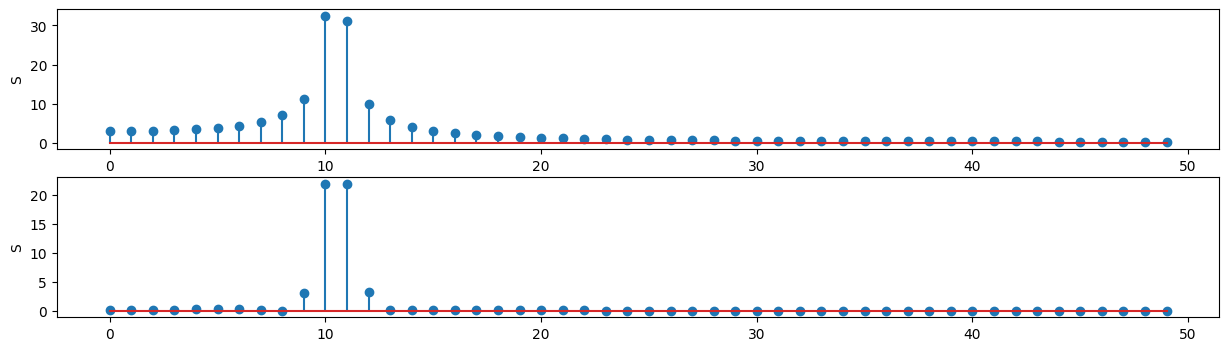

In [44]:
S = fft(sen) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N)

plt.figure(figsize=(15, 4))
plt.subplot(211)
plt.xlabel("N")
plt.ylabel("S")
# plt.plot(Sabs)
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

S = fft(sen_ven_hamm) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
# f = np.arange(0, fm, fm/N) # <----- es importatne reconocer que solo se ve la parte positiva del espejo
plt.subplot(212)
plt.xlabel("")
plt.ylabel("S")
# plt.plot(Sabs)
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

Si tengo picos cercanos, el ventaneo me va a ayudar a visualizar los valles.

In [45]:
fm = 100
f1 = 20
f2 = 70
t = np.arange(0, 1, 1/fm)

sen = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

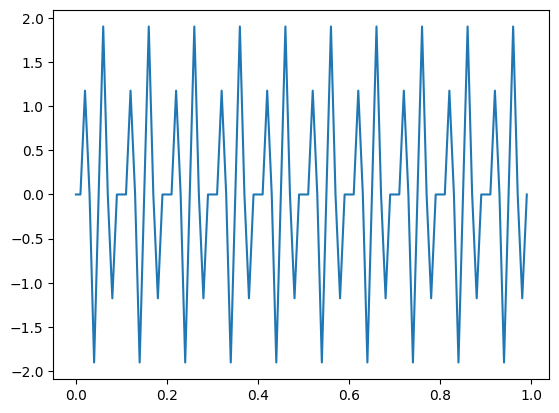

In [47]:
plt.plot(t, sen)

/tmp/ipykernel_4826/2093572914.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

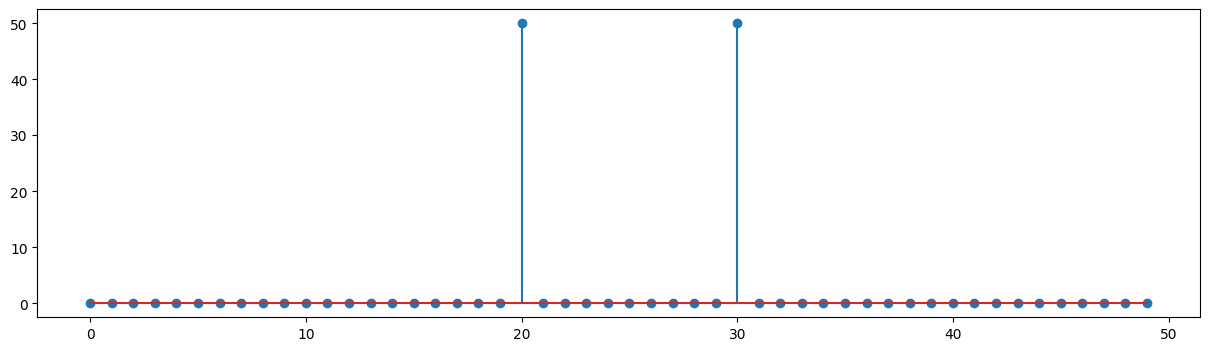

In [48]:
S = fft(sen) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N)

plt.figure(figsize=(15, 4))
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

20Hz está por debajo de la mitad de la mitad de la frecuencia de muestreo, entonces va a estar bien. El pico de 30 viene de la energía que no se pudo capturar de la frecuencia 2. Es una frecuencia aparente, es el pico del espectro que sigue. Si extendemos de 50 a 150 (fm), en el lado negativo del segundo el 70 va a estar en el 30 del primero, 

## Se corrige el aliasing

/tmp/ipykernel_4826/2817900452.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)


<StemContainer object of 3 artists>

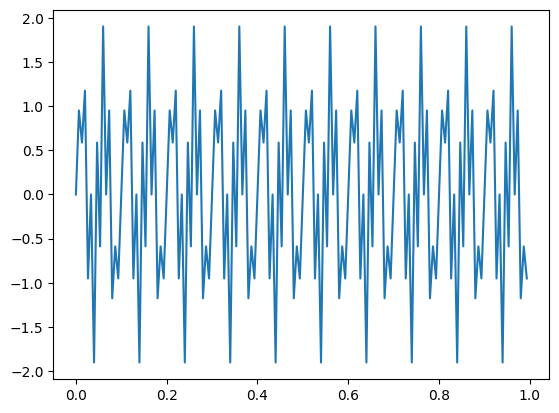

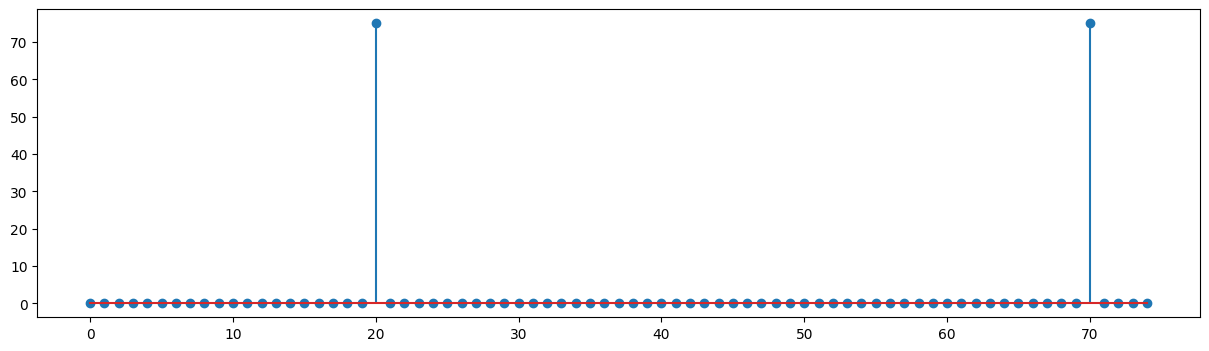

In [53]:
fm = 150
f1 = 20
f2 = 70
t = np.arange(0, 1, 1/fm)
N = len(t)

sen = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
plt.plot(t, sen)

S = fft(sen) # <----- es complejo
Sabs = np.abs(S) # <---- nos quedmamos solo con la magnitud
f = np.arange(0, fm/2, fm/N)

plt.figure(figsize=(15, 4))
plt.stem(f, Sabs[0:int(N/2)], use_line_collection=True)

Si no tenemos la fm, pero si el período de captura, podemos medir otra vez la señal y poniendo el filtro anti alias.